In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
DATA_PATH = '../data/MSK/'
TRIPLET_TYPES = ["cancer_to_drug", 'cancer_to_gene', 'cancer_to_treatment_triplets', 'gene_to_up_regulate_to_cancer', 'all']
TRIPLET_TYPES = {"cancer_to_drug": 0, 'cancer_to_gene': 0, 'cancer_to_treatment': 0, 'gene_to_up_regulate_to_cancer': 2}
SAVED_FIGS = '../saved_figs/'

In [3]:
def get_frequency_graphs(triplet_types:dict, data_path, save_path):
    all_cancer_triplets = None
    for triplet_type, cancer_index in triplet_types.items():
        data = pd.read_csv(data_path + triplet_type + "_triplets.txt", sep="\t", header=None)
        data.rename(columns={cancer_index: "cancer_type"}, inplace=True)
        frequencies = data["cancer_type"].value_counts()
        frequencies = frequencies/sum(frequencies)

        plt.figure(figsize=(20,10))
        plt.bar(frequencies.index, frequencies.values)
        plt.xticks(rotation=90)
        plt.title("Cancer Type Frequencies in {0} triplets".format(triplet_type))
        plt.savefig(save_path + triplet_type + "_triplets.png")
        plt.close()
        if all_cancer_triplets is None:
            all_cancer_triplets = data["cancer_type"]
        else:
            all_cancer_triplets = pd.concat([all_cancer_triplets, data["cancer_type"]])
    triplet_type = "all"
    frequencies =all_cancer_triplets.value_counts()
    plt.figure(figsize=(20,10))
    plt.bar(frequencies.index, frequencies.values)
    plt.xticks(rotation=90)
    plt.title("Cancer Type Frequencies in {0} triplets".format(triplet_type))
    plt.savefig(save_path + triplet_type + "_triplets.png")
    plt.close()
    return all_cancer_triplets


In [5]:
all_cancer_types = get_frequency_graphs(TRIPLET_TYPES, DATA_PATH, SAVED_FIGS)


Text(0.5, 1.0, 'Cancer Type Frequencies in all triplets')

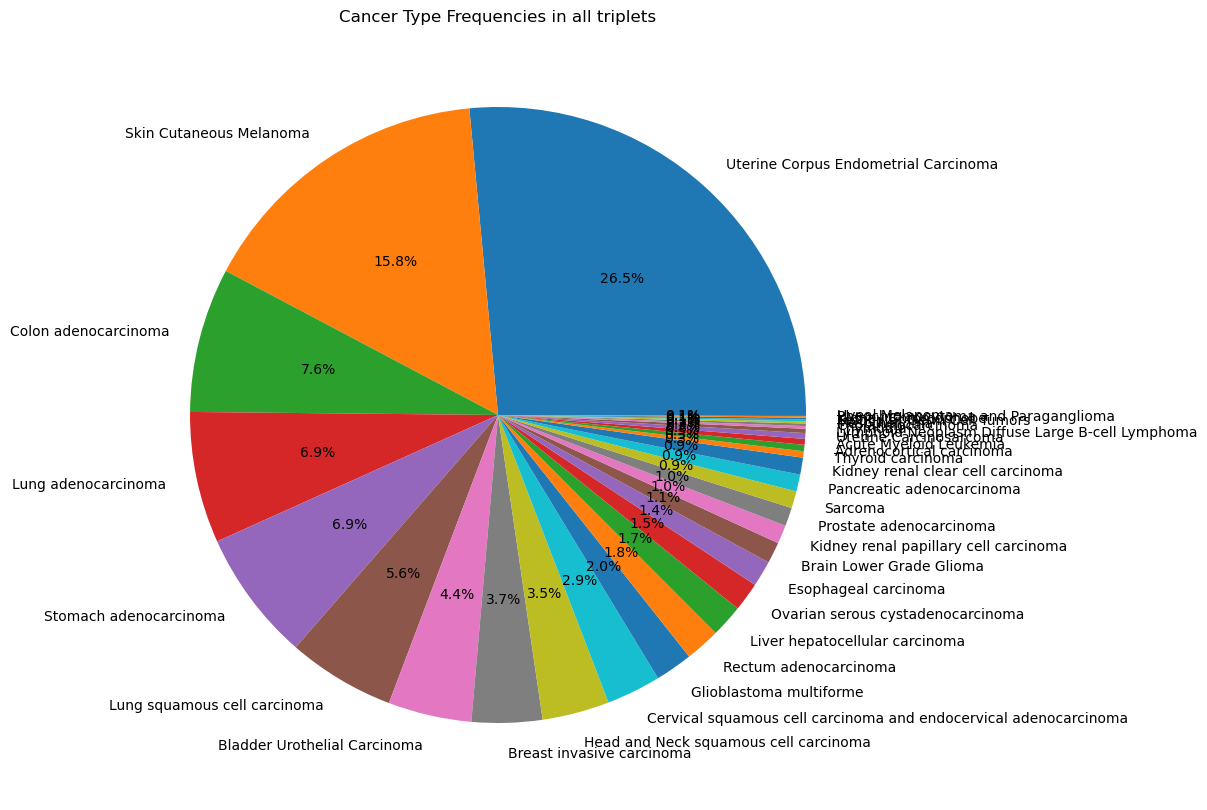

In [6]:
## make pie chart of relative frequencies 
freqncies = all_cancer_types.value_counts() / len(all_cancer_types)
## make pie chart
plt.figure(figsize=(20,10))
plt.pie(freqncies.values, labels=freqncies.index, autopct='%1.1f%%')
## make tex
plt.title("Cancer Type Frequencies in all triplets")

In [8]:
def save_pie(data, triplet_type, save_path):
    print(type(data))
    frequencies = data.value_counts() / len(data)
    plt.figure(figsize=(20,10))
    plt.pie(frequencies.values, labels=frequencies.index, autopct='%1.1f%%')
    plt.title("Cancer Type Frequencies in {0} triplets".format(triplet_type))
    plt.savefig(SAVED_FIGS + triplet_type + "_triplets_pie.png")
    plt.close()
def save_bar(data, triplet_type, save_path):
    frequencies = data.value_counts()
    plt.figure(figsize=(20,10))
    plt.bar(frequencies.index, frequencies.values)
    plt.xticks(rotation=90)
    plt.title("Cancer Type Frequencies in {0} triplets".format(triplet_type))
    plt.savefig(save_path + triplet_type + "_triplets.png")
    plt.close()

In [10]:
def get_frequency_graphs(triplet_types:dict, data_path, save_path):
    all_cancer_triplets = None
    for triplet_type, cancer_index in triplet_types.items():
        data = pd.read_csv(data_path + triplet_type + "_triplets.txt", sep="\t", header=None)
        data.rename(columns={cancer_index: "cancer_type"}, inplace=True)
        data = data["cancer_type"]
        save_bar(data, triplet_type, save_path)
        save_pie(data, triplet_type, save_path)
        if all_cancer_triplets is None:
            all_cancer_triplets = data
        else:
            all_cancer_triplets = pd.concat([all_cancer_triplets, data])
    save_bar(all_cancer_triplets, "all", save_path)
    save_pie(all_cancer_triplets, "all", save_path)


In [11]:
get_frequency_graphs(TRIPLET_TYPES, DATA_PATH, SAVED_FIGS)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
